In [14]:
# Setup and Dependencies
import pandas as pd
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont

In [15]:
# DataFrame Creation
df = pd.read_csv('../cleaned_data.csv')

# Convert timeOpen values to datetime 
df['timeOpen'] = pd.to_datetime(df['timeOpen'])

# Filter timeOpen column based on whether date is first day of the month
df = df[df['timeOpen'].dt.is_month_start]

# Display the DataFrame
df.head()


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap
14,2025-01-01,2025-01-01 23:59:59.999,2025-01-01 21:25:00,2025-01-01 09:28:00,2781.0,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12
45,2024-12-01,2024-12-01 23:59:59.999,2024-12-01 22:01:00,2024-12-01 02:59:00,2781.0,96461.336800,97888.127270,95770.184465,97279.792922,3.659070e+10,1.924785e+12
75,2024-11-01,2024-11-01 23:59:59.999,2024-11-01 14:31:00,2024-11-01 02:12:00,2781.0,70216.896968,71559.016570,68779.700341,69482.469851,4.998980e+10,1.374188e+12
106,2024-10-01,2024-10-01 23:59:59.999,2024-10-01 07:40:00,2024-10-01 20:42:00,2781.0,63335.603584,64110.981999,60189.278697,60837.009701,5.022092e+10,1.202222e+12
136,2024-09-01,2024-09-01 23:59:59.999,2024-09-01 00:17:00,2024-09-01 23:19:00,2781.0,58969.799454,59062.070812,57217.823863,57325.487689,2.459245e+10,1.132107e+12


In [16]:
# Define the max price in the close column
max = df['close'].max()

# Define the percentages of close price / max close price and reverse the order
percentage = [value / max for value in df['close'].to_list()][::-1]

# Extract all dates from the filtered timeOpen column and reverse the order
dates = [datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S").strftime("%B %d, %Y") for date in df['timeOpen'].to_list()][::-1]

# Extract all prices from the filtered close column and reverse the order
prices = [i for i in df['close'].to_list()][::-1]

# Display percentage list
percentage

[6.215543658512934e-07,
 6.450262496969185e-07,
 6.211211823633964e-07,
 2.0178470173828815e-06,
 2.5521177887185383e-06,
 3.0838881435474066e-06,
 7.119788593226245e-06,
 9.664782394740645e-06,
 8.006965029435192e-06,
 3.701612166130007e-05,
 9.800047783417023e-05,
 0.0001766077223633953,
 0.00013714983584153895,
 8.668583481392331e-05,
 5.4208524006717175e-05,
 3.337049404074107e-05,
 3.139548819185581e-05,
 5.275967275235138e-05,
 5.917606079398912e-05,
 5.0577543724081045e-05,
 5.0511617391311e-05,
 5.1398135725790116e-05,
 5.373375552075973e-05,
 6.842702199533834e-05,
 9.769795868691537e-05,
 0.00010643428022368432,
 0.00012776274606094234,
 0.00011253686517134996,
 0.00012950902475764546,
 0.00013879025257358698,
 0.00021097955365079093,
 0.00035010527938914964,
 0.0010235228747811028,
 0.0012026135577526975,
 0.0013291558212402983,
 0.0009051212015025301,
 0.0010690812230964343,
 0.0014220835816161383,
 0.0013587610407569423,
 0.002119453449498636,
 0.00982578135573145,
 0.0079

In [17]:
# GIF creation

# Define variables
logo_path = "../bitcoin_logo.png" 
output_gif = "../../output/filled_bitcoin.gif"
fill_color = (255, 153, 0, 255)  # Bitcoin Orange fill color
font_path = "arial.ttf"
font_size = 50 # Font for text
font = ImageFont.truetype(font_path, font_size)  # Load the font with the specified size

# Create frames and durations for the GIF
frames = []
frame_durations = []  # List to hold the duration of each frame

# Loop to iterate through each item in percentage
for i, value in enumerate(percentage):
    
    # Open the Bitcoin logo
    logo = Image.open(logo_path).convert("RGBA")
    width, height = logo.size

    # Create a mask for the circular area
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)
    circle_bounds = (0, 0, width, height)
    draw.ellipse(circle_bounds, fill=255)  # White (255) means inside the mask
    date_text = dates[i]
    price_text = f"Price: ${prices[i]:,.2f}"

    # Create a fully transparent frame (logo size + extra height for text)
    final_frame = Image.new("RGBA", (width, height + 120), (255, 255, 255, 0))  # Transparent background
    filled_frame = Image.new("RGBA", (width, height), (255, 255, 255, 0))  # Transparent layer for the fill

    # Draw the fill inside the logo area
    fill_height = height * value
    box = (0, height - fill_height, width, height)

    # Draw the filled portion
    ImageDraw.Draw(filled_frame).rectangle(box, fill=fill_color)
    filled_area = Image.composite(filled_frame, Image.new("RGBA", (width, height), (255, 255, 255, 0)), mask)

    # Combine the fill with the logo
    logo_with_fill = Image.alpha_composite(filled_area, logo)
    final_frame.paste(logo_with_fill, (0, 120))  # Paste the filled logo lower to leave room for text

    # Generate text and place above logo
    draw = ImageDraw.Draw(final_frame)
    text_x = width // 2
    draw.text((text_x, 30), date_text, font=font, fill="white", anchor="mm")  # Center the date text
    draw.text((text_x, 80), price_text, font=font, fill="white", anchor="mm")  # Center the price text

    # Append the final frame to the frames list
    frames.append(final_frame)

    # Determine the duration for the frame
    if prices[i] == max:
        frame_durations.append(3000)  # 5 seconds for max price
    elif 0.8 * max < prices[i] < 1.2 * max:
        frame_durations.append(1500)
    else:
        frame_durations.append(5)  # Default duration (100 ms)

# Save the GIF
frames[0].save(
    output_gif,
    save_all=True,
    append_images=frames[1:],
    duration=frame_durations,  # Custom durations for each frame
    loop=0,
    disposal=2  # Clear each frame before drawing the next one
)

# Confirmation of saved GIF
print(f"GIF saved to {output_gif}")

GIF saved to ../../output/filled_bitcoin.gif


In [93]:
etfs = ['../ETFs/IBIT.csv','../ETFs/FBTC.csv','../ETFs/BITB.csv']

In [120]:
import random

# Define the links
etfs = ['../ETFs/IBIT.csv','../ETFs/FBTC.csv','../ETFs/BITB.csv']

# Define function to plot price percentage change data
def plot_etfs(link):
    df = pd.read_csv(link)
    etf = link.split('/')[-1].split('.')[0].upper()
    ratio = df['% Change'].to_list()
    dates = [datetime.strptime(str(date), '%Y-%m-%dT%H:%M:%S.%fZ').strftime("%B %d, %Y") for date in df['Date'].to_list()]
    plt.plot(dates, ratio, color = colors[i], label = etf, linewidth=linewidth[i],alpha=alphas[i])
    

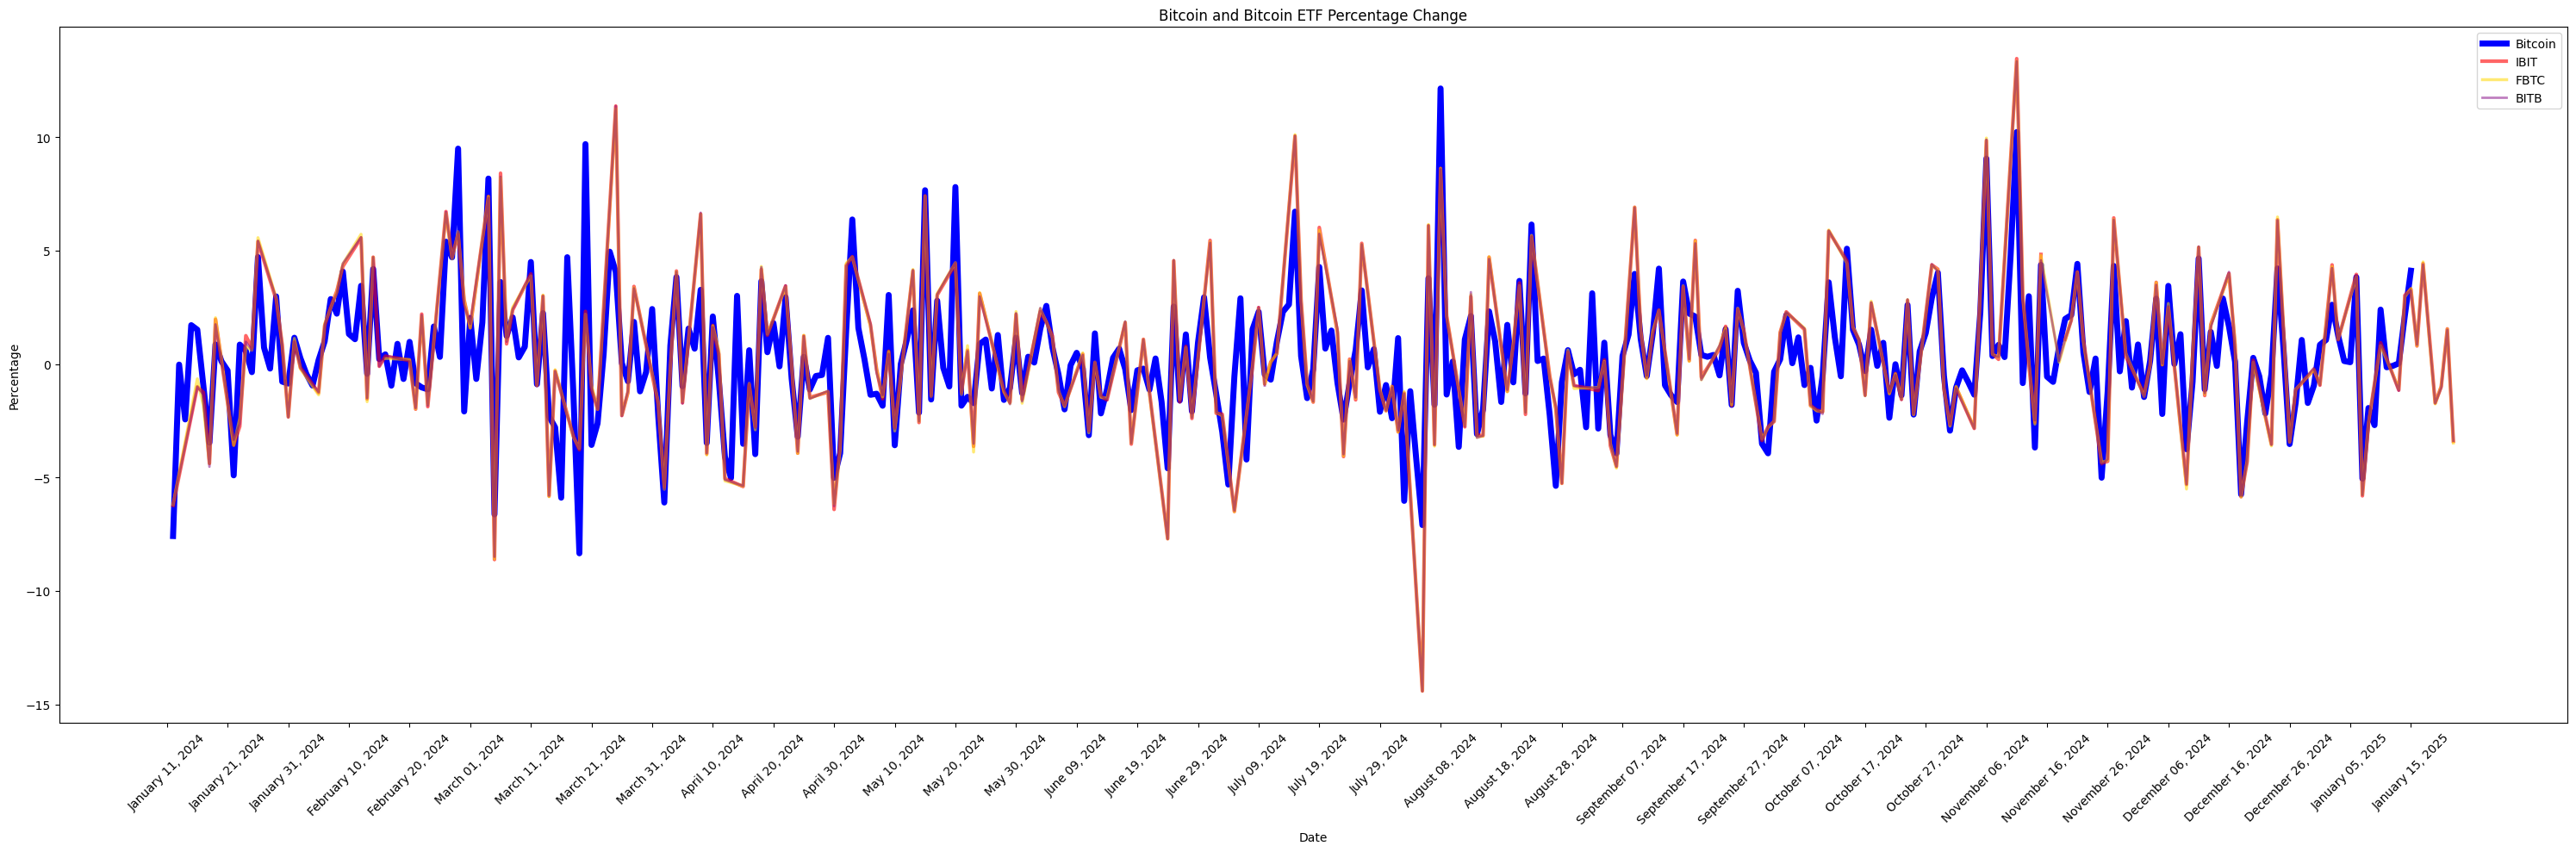

In [122]:
import matplotlib.pyplot as plt

#Define colors for plot 
colors = ['red', 'gold', 'purple']
alphas = [0.6, 0.55, 0.5]
linewidth = [3, 2.5, 2]


# Read in cleaned_data csv
df = pd.read_csv('../cleaned_data.csv')

# Set dates to datetime
df['timeOpen'] = pd.to_datetime(df['timeOpen'])

# Filter data to correspond with ETF data
df = df[(df['timeOpen'] >= pd.to_datetime('2024-01-11'))].sort_values(by='timeOpen',ascending=True)

# Define percentage change
df['value_ratio'] = df['close'] / df['close'].shift(1)
ratio = [(i * 100 - 100)for i in df['value_ratio'].to_list()]

# Set date labels
dates = [datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime("%B %d, %Y") for date in df['timeOpen'].to_list()]

# Plot properties and settings
plt.figure(figsize=(30, 10))
plt.plot(dates, ratio, color = 'blue',linewidth=5, label = 'Bitcoin')

xtick_frequency = 10  # Show every 10th date
plt.xticks(ticks=range(0, len(dates), xtick_frequency), labels=dates[::xtick_frequency], rotation=45)

for i, etf in enumerate(etfs):
    try:
        plot_etfs(etf)
    except:
        raise
plt.title('Bitcoin and Bitcoin ETF Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.savefig('../../output/etfs.png')
plt.tight_layout()

# Show the plot
plt.show()
